In [31]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import arviz as az
from sklearn.linear_model import LogisticRegression
import pymc as pm
from google.colab import files

## The Dataset

You can download the dataset from here: https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

In [32]:
## 1 point

## read the csv file into a dataframe and show the first 5 rows
file_to_upload = files.upload()

diab_df = pd.read_csv('diabetes.csv')

diab_df.head(5)

Saving diabetes.csv to diabetes (4).csv


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [33]:
## 3 points

## Assign the Outcome variable to y and the rest to X.
X,y = diab_df[["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]], diab_df["Outcome"]

## USe LogisticRegression to fit the data and print out the intercept and the coefficients
log = LogisticRegression(random_state=0, max_iter = 500).fit(X, y)

coef = log.coef_

print("Coefficients:\n")
for p,c in zip(["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"],list(coef[0])):
    print(p + '\t' + str(c))

inter = log.intercept_
print("\nIntercept:\n")
print(inter)


Coefficients:

Pregnancies	0.12236094725638227
Glucose	0.035110569323652654
BloodPressure	-0.013296875187246886
SkinThickness	0.000786285042868356
Insulin	-0.0011736606503952552
BMI	0.08967721631652409
DiabetesPedigreeFunction	0.8662797201091111
Age	0.015006363400185423

Intercept:

[-8.365745]


In [41]:
## 2 points

with pm.Model() as logreg_model:
  
    w0 = pm.Normal('w0', mu=0, sigma=100)
    w1 = pm.Normal('w1', mu=0, sigma=100)
    w2 = pm.Normal('w2', mu=0, sigma=100)
    w3 = pm.Normal('w3', mu=0, sigma=100)
    w4 = pm.Normal('w4', mu=0, sigma=100)
    w5 = pm.Normal('w5', mu=0, sigma=100)
    w6 = pm.Normal('w6', mu=0, sigma=100)
    w7 = pm.Normal('w7', mu=0, sigma=100)
    w8 = pm.Normal('w8', mu=0, sigma=100)
   
    
    linreg = w0 * np.ones(diab_df.shape[0]) + w1 * diab_df.Pregnancies.values + w2 * diab_df.Glucose.values \
    + w3 * diab_df.BloodPressure.values + w4 * diab_df.SkinThickness.values + w5 * diab_df.Insulin.values + \
    w6 * diab_df.BMI.values + w7 * diab_df.DiabetesPedigreeFunction.values + w8 * diab_df.Age.values
    p_outcome = pm.invlogit(linreg)

    likelihood = pm.Bernoulli('likelihood', p_outcome, observed=diab_df.Outcome.values)

    
    map_est= pm.find_MAP()
    print(map_est)


{'w0': array(-8.40166888), 'w1': array(0.12311865), 'w2': array(0.0351519), 'w3': array(-0.01329542), 'w4': array(0.00061588), 'w5': array(-0.0011909), 'w6': array(0.0896803), 'w7': array(0.94448272), 'w8': array(0.01486235)}


## Explain what the code is doing:
> **With properly formatted data, the code will build a logistic model and using logistic regression, output the the local maximum a posteriori point for each variable**

## What are the prior probabilities of the intercept and coefficients?
> **Prior probabilities: 'w0': -8.40166888, 'w1': 0.12311865, 'w2': 0.0351519, 'w3': -0.01329542, 'w4': 0.00061588, 'w5': -0.0011909, 'w6': 0.0896803, 'w7': 0.94448272), 'w8': 0.01486235**

## Which likelihood distribution has been used?
> **The likelihood distribution that was used was the Bernoulli distribution**

## What does pm.invlogit(linreg) mean?
> **pm.invlogit is the inverse function of the logit(logistic) function. The meaning of pm.invlogit(linreg) is to find the probability on the y axis for logistic regression, whihc can only be donw with the invlogit function**

## What is map_est?
> **'map_est' is the estimation for the local maximum a posteriori point**

<ipython-input-37-0300b952d742>:7: FutureWarning: The `start` kwarg was renamed to `initvals` and can now do more. Please check the docstring.
  trace = pm.sample(400,step=steps, start=map_est)


array([[<Axes: title={'center': 'w0'}>, <Axes: title={'center': 'w1'}>,
        <Axes: title={'center': 'w2'}>],
       [<Axes: title={'center': 'w3'}>, <Axes: title={'center': 'w4'}>,
        <Axes: title={'center': 'w5'}>],
       [<Axes: title={'center': 'w6'}>, <Axes: title={'center': 'w7'}>,
        <Axes: title={'center': 'w8'}>]], dtype=object)

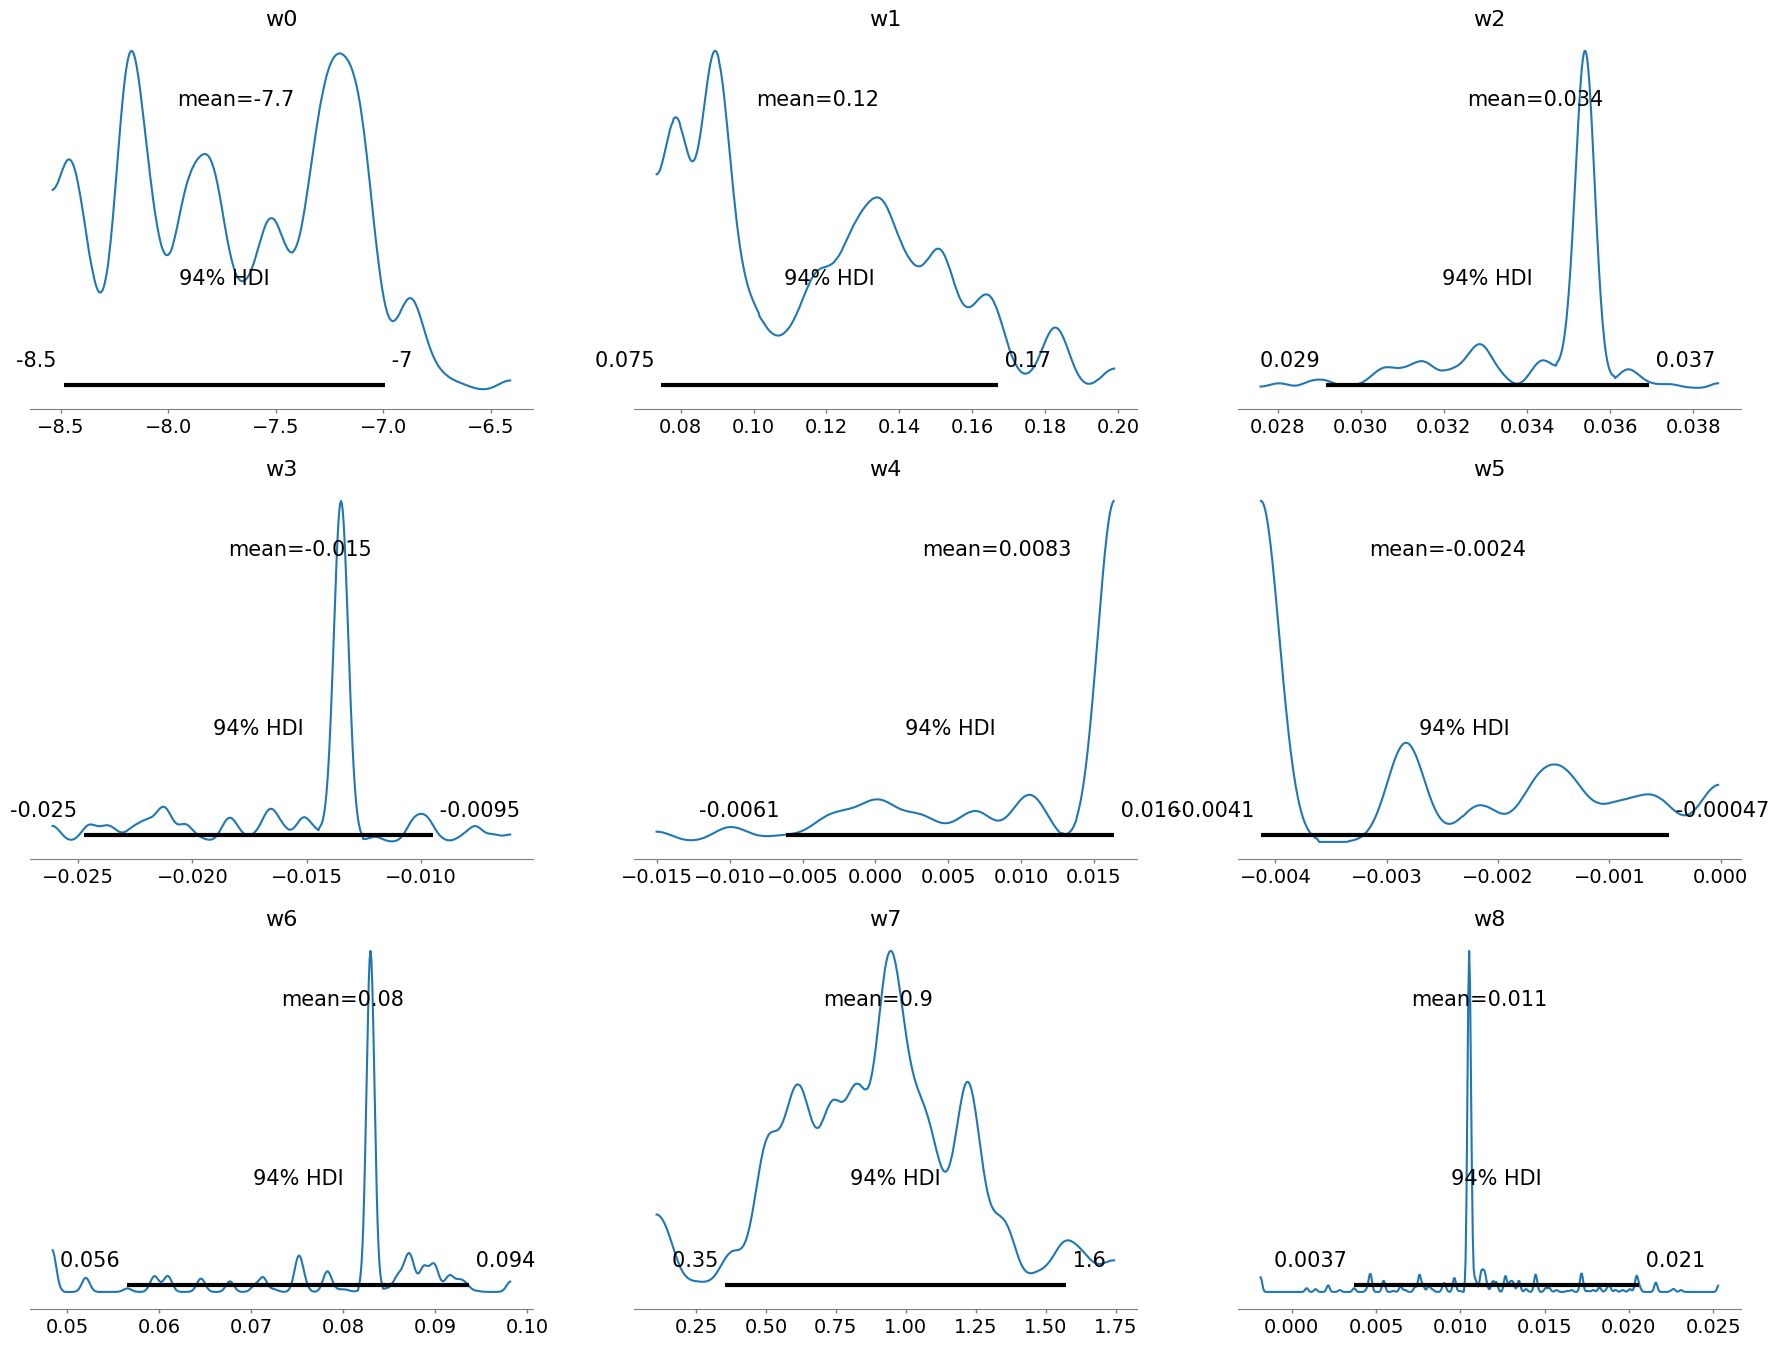

In [37]:
## 2 points

with logreg_model:
## ToDo: draw 400 samples using pm.Metropolis() and assign to the variable trace

  steps = pm.Metropolis()
  trace = pm.sample(400,step=steps, start=map_est)

az.plot_posterior(trace)

In [38]:
az.summary(trace)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
w0,-7.687,0.494,-8.486,-6.990,0.329,0.273,2.0,13.0,2.42
w1,0.118,0.032,0.075,0.167,0.012,0.009,11.0,12.0,1.14
w2,0.034,0.002,0.029,0.037,0.001,0.001,4.0,11.0,2.99
w3,-0.015,0.004,-0.025,-0.009,0.002,0.001,6.0,15.0,2.26
w4,0.008,0.008,-0.006,0.016,0.005,0.004,3.0,16.0,2.13
w5,-0.002,0.001,-0.004,-0.000,0.001,0.001,3.0,3.0,2.29
w6,0.080,0.010,0.056,0.094,0.005,0.004,7.0,11.0,2.39
w7,0.901,0.320,0.353,1.571,0.108,0.084,9.0,33.0,1.24
w8,0.011,0.004,0.004,0.021,0.001,0.001,10.0,49.0,1.70


## Explain the output of the plot


> **The output of the plot is the posterior distribution of each variable. The HDI stands for Highest Probability Density, which means any point within that boundary will have more probability than points outside It also shows the posteriors mean of each variable as well**

